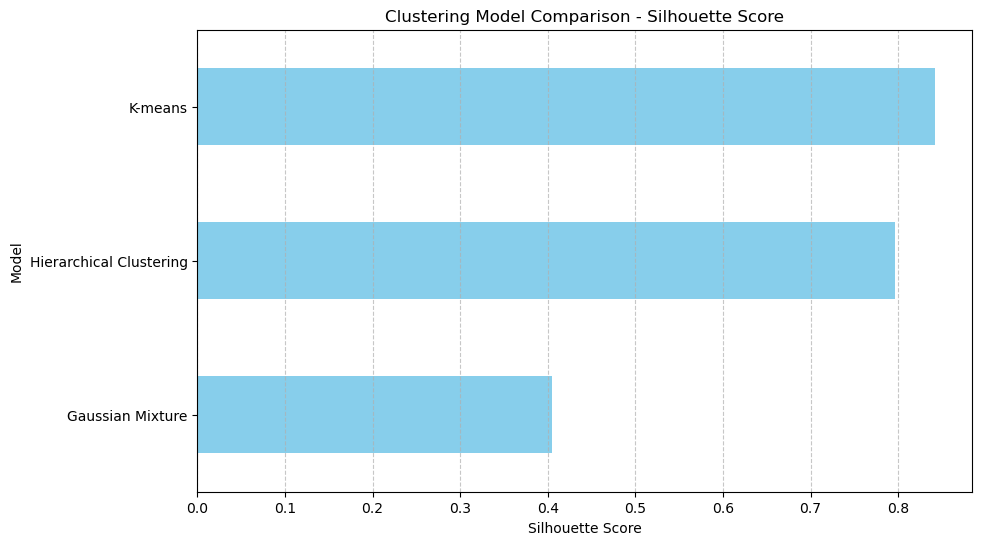

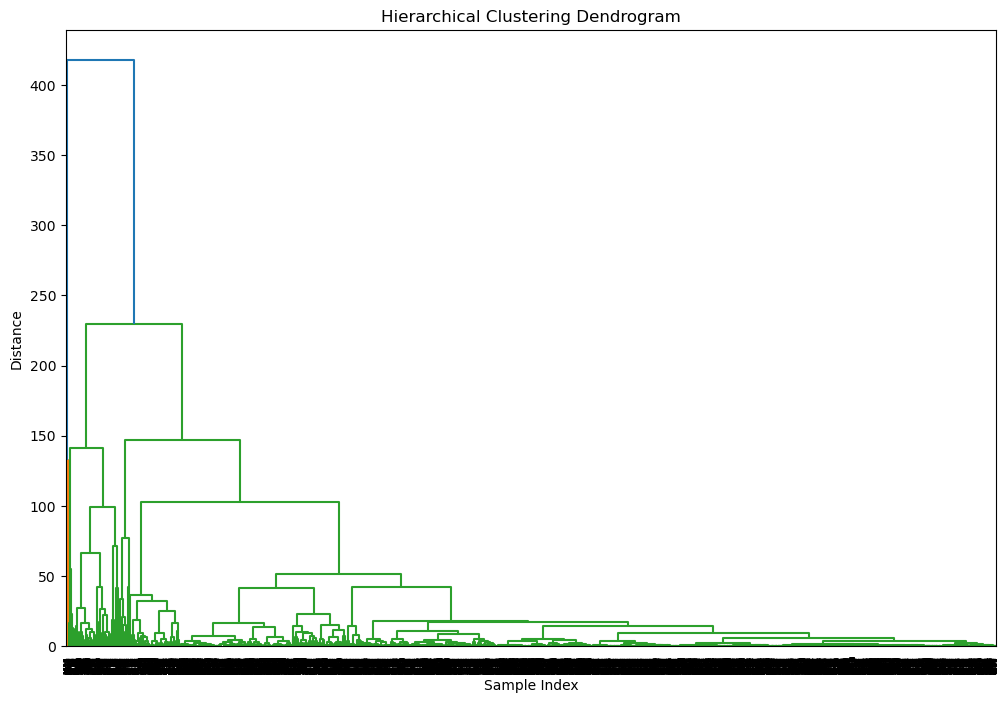


Clustering Model Performance Metrics
                         Silhouette Score
K-means                          0.842476
Hierarchical Clustering          0.796502
Gaussian Mixture                 0.405286


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

warnings.filterwarnings('ignore')

# Load dataset
file_path = "Data_Source/Global_Economy_Indicators.csv"
data = pd.read_csv(file_path)


# Clean column names
data.columns = data.columns.str.strip()

# Sort by Country and Year to calculate GDP growth
data_sorted = data.sort_values(by=["CountryID", "Year"])

data_sorted["GDP Growth"] = data_sorted.groupby("CountryID")["Gross Domestic Product (GDP)"].diff()
data_sorted = data_sorted.dropna()

# Define features
excluded_columns = ["CountryID", "Country", "Year", "Currency", "GDP Growth"]
features = data_sorted.drop(columns=excluded_columns)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
features_imputed = imputer.fit_transform(features_scaled)

# Initialize clustering models
clustering_models = {
    "K-means": KMeans(n_clusters=3, random_state=42),
    "Hierarchical Clustering": AgglomerativeClustering(n_clusters=3),
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42),
}

# Evaluate models
results = {}
for name, model in clustering_models.items():
    if name == "Hierarchical Clustering":
        model.fit(features_imputed)
        labels = model.labels_
    else:
        labels = model.fit_predict(features_imputed)
    
    silhouette_avg = silhouette_score(features_imputed, labels)
    results[name] = {
        "Silhouette Score": silhouette_avg
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
results_df["Silhouette Score"].sort_values().plot(kind="barh", color="skyblue")
plt.title("Clustering Model Comparison - Silhouette Score")
plt.xlabel("Silhouette Score")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Hierarchical clustering dendrogram
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(features_imputed, method="ward")
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Print results
def print_results_table(df):
    print("\nClustering Model Performance Metrics")
    print("=" * 50)
    print(df)

print_results_table(results_df)